## Example notebook for the ATOM pipeline
---------------------------------

Load the Australian Weather dataset from Kaggle at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.

In [1]:
# Import packages
import numpy as np
import pandas as pd
from atom import ATOM

In [19]:
# Load the Australian weather dataset as a pandas dataframe
# Make sure to have the file 'weatherAUS.csv' in the same directory as your notebook

X = pd.read_csv('weatherAUS.csv')
Y = X['RainTomorrow']  # Target feature
X = X.drop('RISK_MM', axis=1)  # Feature directly related to the target
X = X.drop('RainTomorrow', axis=1)

In [3]:
# Run ATOM pipeline
atom = ATOM(models=['MNB', 'LogReg', 'RF', 'lSVM'],
            metric="accuracy",
            impute='median',
            strategy='univariate',
            max_features=0.8,
            ratio=0.25,
            max_iter=10,
            batch_size=2,
            init_points=3,
            n_splits=3,
            verbose=3)

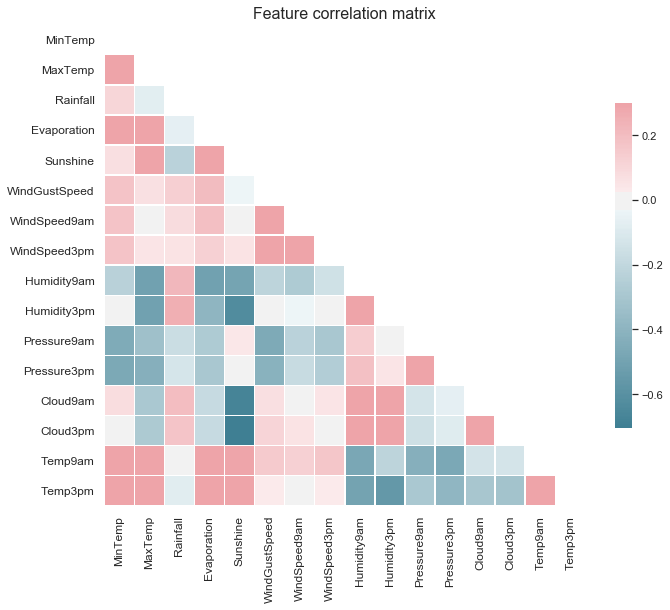

In [4]:
atom.plot_correlation(X)

In [5]:
atom.fit(X, Y, percentage=3)


<================ ATOM ================>

Algorithm set to binary classification.
Models in pipeline: ['MNB', 'LogReg', 'RF', 'lSVM']

Data preprocessing =============>
Checking feature types...
Imputing missing values...
Encoding categorical features...
 --> Label-encoding feature Date. Contains 2339 unique categories.
 --> Label-encoding feature Location. Contains 49 unique categories.
 --> Label-encoding feature WindGustDir. Contains 16 unique categories.
 --> Label-encoding feature WindDir9am. Contains 16 unique categories.
 --> Label-encoding feature WindDir3pm. Contains 16 unique categories.
 --> Label-encoding feature RainToday. Contains 2 unique categories.
Performing feature selection...
 --> Feature Date was removed after the univariate test (score: 4.52  p-value: 0.03).
 --> Feature Location was removed after the univariate test (score: 2.22  p-value: 0.14).
 --> Feature WindGustDir was removed after the univariate test (score: 9.41  p-value: 0.00).
 --> Feature WindDir3pm 

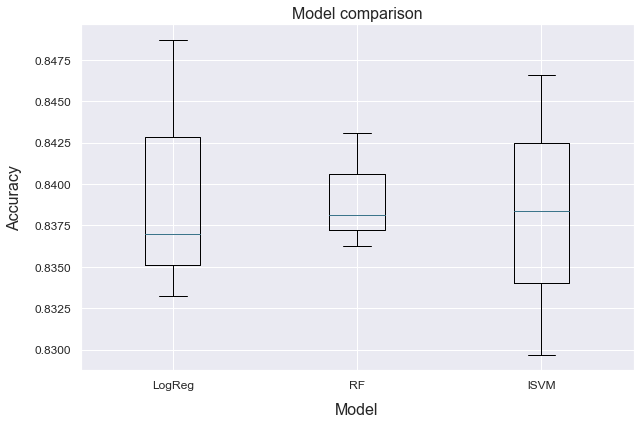

In [6]:
atom.boxplot()

In [7]:
atom.LogReg.best_params

{'max_iter': 156, 'C': 1.2, 'penalty': 'l2'}

In [8]:
atom.MNB.error

'ValueError: Input X must be non-negative'

In [9]:
atom.RF.best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=67,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
atom.LogReg.Precision()

0.7482993197278912

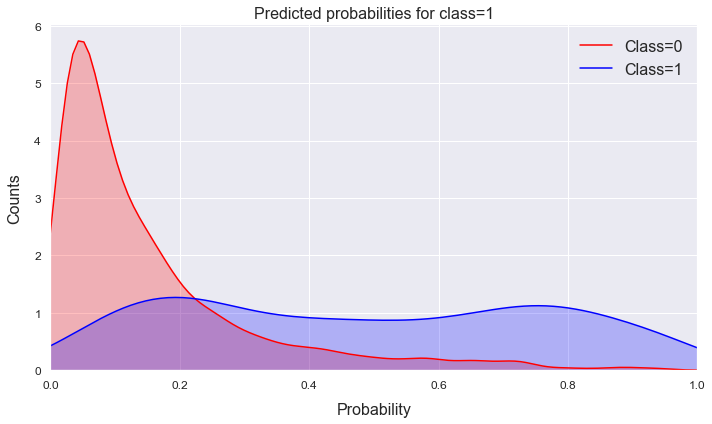

In [11]:
atom.lSVM.plot_probabilities()

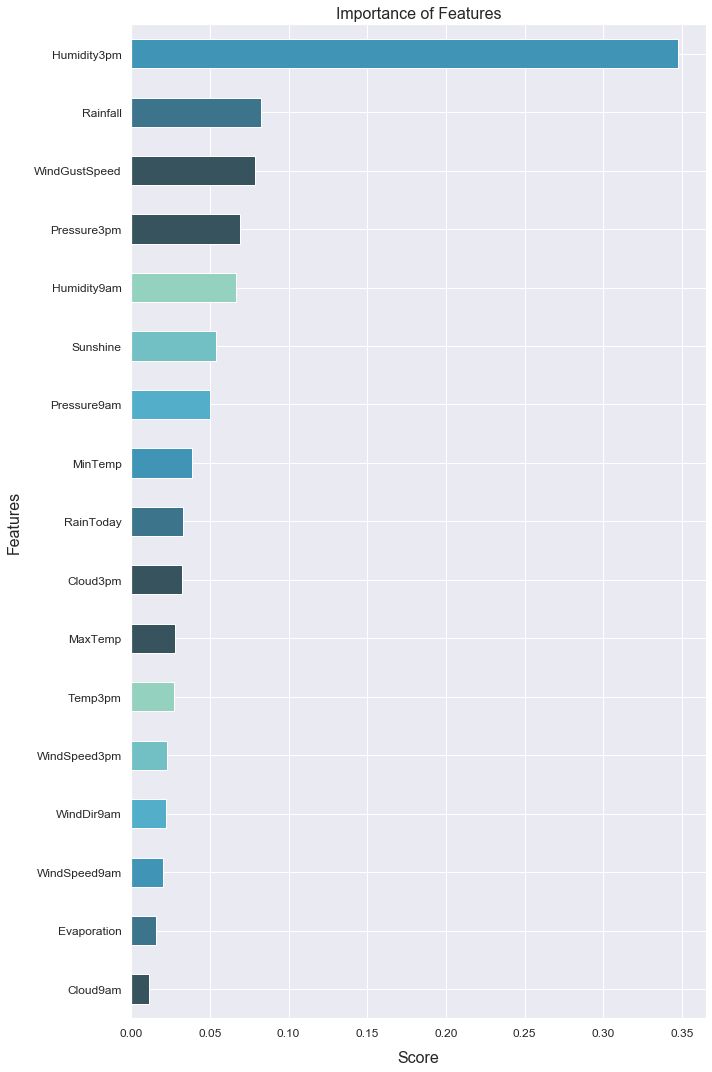

In [12]:
atom.RF.plot_feature_importance()

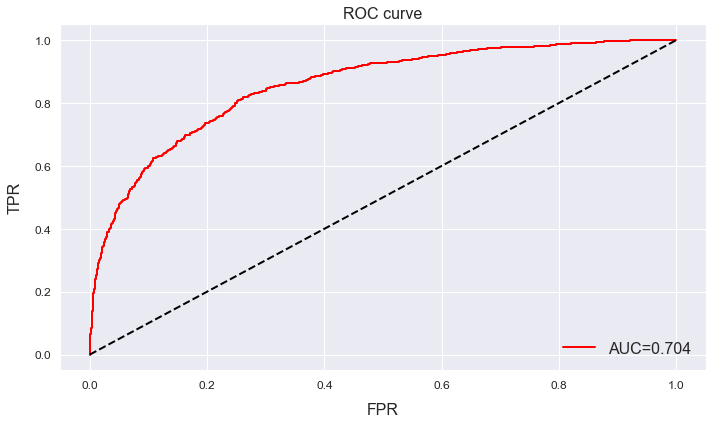

In [13]:
atom.LogReg.plot_ROC()

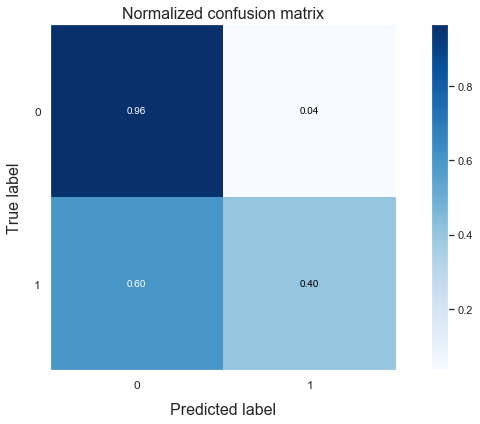

In [14]:
atom.RF.plot_confusion_matrix()

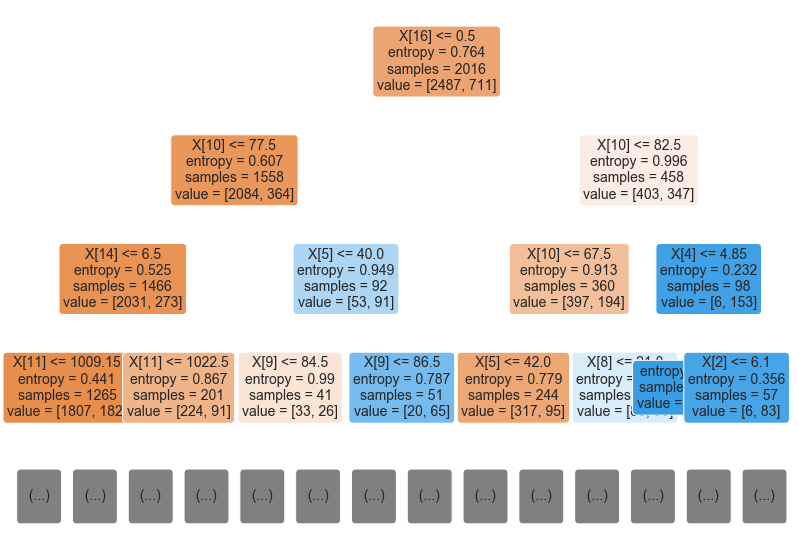

In [15]:
atom.RF.plot_decision_tree(0, max_depth=3, rotate=False)

## Alternatively, the data cleaning methods can be called independently of the fit method to further tune specific parameters.

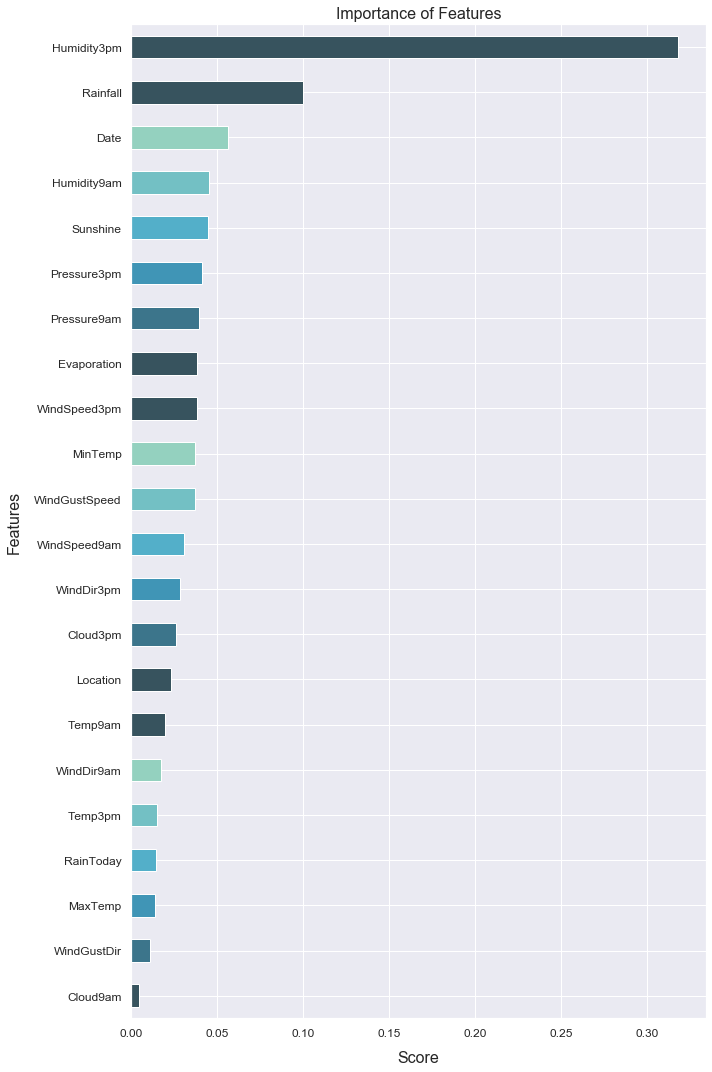

In [16]:
atom = ATOM('RF', cv=False)
atom.fit(X, Y, percentage=1)
atom.rf.plot_feature_importance()

In [20]:
aml = ATOM(models=['LogReg', 'LDA', 'SGD'],
           metric="f1",
           max_iter=2,
           init_points=1,
           verbose=1)

X = aml.imputer(X, strategy='mean',
                max_frac_missing=0.5,
                missing=[np.inf, -np.inf, '', '?', 'NA', 'nan', 'NaN', None])
X = aml.encoder(X, max_number_onehot=10)
X = aml.feature_selection(X, Y,
                          strategy='RFS',
                          solver=atom.RF.best_model,
                          max_features=15,
                          threshold=0.025,
                          frac_variance=1,
                          max_correlation=0.98)
aml.fit(X, Y, percentage=1)


<================ ATOM ================>

Algorithm set to binary classification.
Models in pipeline: ['LogReg', 'LDA', 'SGD']


Running pipeline =================>


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.10s/it]




Final stats ================>>
Total duration: 00h:00m:03s
Target metric: F1
------------------------------------
Logistic Regression          --> 0.561 ± 0.026
Linear Discriminant Analysis --> 0.563 ± 0.021 !!
Stochastic Gradient Descent  --> 0.560 ± 0.052
